<a href="https://colab.research.google.com/github/sachin-cw/Springboard-Capstone/blob/master/Quora_Quest_Use_Pretrained_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments using word embeddings obtained by Gensim's word2vec implementation.  

Load all the dependencies and mount the Google drive to load the training file.

In [0]:
!pip install ipython-autotime
%load_ext autotime
# above lines get me the cell execution time.

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#above lines help me avoid warnings thrown by sklearn


import re
import os

import unicodedata

import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

from datetime import datetime
from pytz import timezone
import time

from sklearn.model_selection import train_test_split

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')


from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/kaggle/quora')
!ls -ltr


  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=e12a789005c5b75f054d7e2f7583a0807333f98db26301187b54568b77e3821d
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Ente

Map below will be used to expand the contractions

In [0]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

time: 122 ms


Next up are functions.

In [0]:

from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
  #  classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def remove_special_chars(text):
  return re.sub(r'[^a-zA-Z0-9 \']', '', text)

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens

def normalize_text(text):
  text=remove_special_chars(text)
  text=expand_contractions(text)
  text=text.lower()
  text=remove_accented_chars(text)
  #text=tokenize_text(text)
  return text

def remove_stopwords_nltk(tokens):
  filtered_tokens = [token for token in tokens if token not in stop_words]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text




def stem_sentences_nltk(sentence):
  ps = PorterStemmer()
  tokens = sentence.split()
  stemmed_tokens = [ps.stem(token) for token in tokens]
  return ' '.join(stemmed_tokens)


  
  
def stem_sentences_list(sentence):
  ps = PorterStemmer()
  tokens = sentence.split()
  stemmed_tokens = [ps.stem(token) for token in tokens]
  return stemmed_tokens


def preprocess_text(df,stem=False):
  if stem:
    df['word_tokens_stemmed']=df['question_text'].apply(normalize_text).apply(tokenize_text).apply(remove_stopwords_nltk).apply(stem_sentences_nltk)
  else:
    df['word_tokens_preprocessed']=df['question_text'].apply(normalize_text).apply(tokenize_text).apply(remove_stopwords_nltk)
  
  return df




def split_train_test(df,stem=False):
  if stem:
    x_train,x_test,y_train,y_test = train_test_split(df['word_tokens_stemmed'],df['target'], random_state=1,stratify=df['target'])
  else:
    x_train,x_test,y_train,y_test = train_test_split(df['word_tokens_preprocessed'],df['target'], random_state=1,stratify=df['target'])
  return x_train,x_test,y_train,y_test

def classifier_reports(y_test, y_pred):
  print()
  class_names = ['class0', 'class1']
  print(classification_report(y_test, y_pred, target_names=class_names))
  # Plot non-normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')
  # Plot normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
  plt.show()

time: 222 ms


Load the training file and preprocess it.

In [0]:

df=pd.read_csv('train.csv')

pd.options.display.max_colwidth = 500
print('Number rows and columns:',df.shape)
df=preprocess_text(df,stem=False)  
df.head()

Number rows and columns: (1306122, 3)


,qid,question_text,target,word_tokens_preprocessed
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0,quebec nationalists see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0,adopted dog would encourage people adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0,velocity affect time velocity affect space geometry
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0,otto von guericke used magdeburg hemispheres
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0,convert montra helicon mountain bike changing tyres


time: 6min 21s


We are going to use google’s pre-trained model. It contains word vectors for a vocabulary of 3 million words trained on around 100 billion words from the google news dataset.

In [0]:
# needs ~ 2 mins 

import gensim.models
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
wv.init_sims(replace=True)

# Quick test
#wv.most_similar('Dhoni', topn = 5)
#wv.doesnt_match(['apple','banana','flower'])
#wv.most_similar(positive = ['king','woman'], negative = ['man'])


time: 1min 48s



 The below code which is just included here for reference gets the average of 300 dimensions word vectors created for every word in the question. So, the averaged word vector is a word vector for the question as a whole.
 
 This piece of code takes a crazy amount of time since the calculations are all on pandas. The next piece of code below the one below uses numpy and is many times faster. 

In [0]:


'''
docs_vectors = pd.DataFrame()  # creating empty final dataframe
for doc in df['word_tokens_preprocessed'].head(10): # looping through each document 
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
      try:
        word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
        temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
      except:
        pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
docs_vectors.shape
docs_vectors

'''

"\ndocs_vectors = pd.DataFrame()  # creating empty final dataframe\nfor doc in df['word_tokens_preprocessed'].head(10): # looping through each document \n    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)\n    for word in doc.split(' '): # looping through each word of a single document and spliting through space\n      try:\n        word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed\n        temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe\n      except:\n        pass\n    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)\n    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe\ndocs_vectors.shape\ndocs_vectors\n\n"

time: 4.86 ms


The code below does what the above code does - gets the average of 300 dimension word vectors for every word in the question. So, the averaged word vector is a word vector for the question as a whole. This code is highly efficient since it's all on numpy.

In [0]:
#below code takes ~ 3 mins for the entire dataset.
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words.split(' '):
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=df['word_tokens_preprocessed'], model=wv,
                                             num_features=300)
question_vectors=pd.DataFrame(w2v_feature_array)

time: 2min 7s


In [0]:
question_vectors.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.018067,-0.008654,0.033949,0.104407,0.015154,-0.022662,0.011199,-0.01703,0.029094,0.022753,-0.028494,-0.007509,-0.018233,-0.014963,-0.050197,0.050271,-0.016033,0.041003,0.01635,-0.018886,0.014617,0.004689,0.021522,0.001047,-0.008804,0.003395,-0.036444,0.005319,0.038285,0.007919,0.003856,0.003547,-0.058357,0.042682,0.011816,-0.000766,-0.013933,0.050724,0.070337,0.013558,...,0.009237,0.006099,0.038406,0.006643,0.007258,0.022556,-0.002776,-0.006169,-0.037602,-0.026262,0.00407,0.008282,0.050315,0.027158,-0.006079,0.001142,-0.010015,-0.047221,-0.027837,0.040603,-0.043587,-0.005792,0.044552,-0.013637,-0.003773,-0.029622,-0.067217,0.000026,0.011591,0.004024,-0.018583,-0.014137,-0.024467,0.015231,-0.016778,0.001638,-0.039175,-0.002906,0.086741,0.006184


time: 158 ms


Verify the embeddings are generated for every sample in the dataset. Split up  the dataset into training and testing dataset.

In [0]:
assert len(question_vectors)==len(df)

question_vectors['target']=df['target']

x_train,x_test,y_train,y_test = train_test_split(question_vectors.drop('target',axis=1),question_vectors['target'], random_state=42,stratify=df['target'])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

time: 10.3 s


LogisticRegression

              precision    recall  f1-score   support

      class0       0.95      0.99      0.97    306328
      class1       0.55      0.19      0.29     20203

    accuracy                           0.94    326531
   macro avg       0.75      0.59      0.63    326531
weighted avg       0.92      0.94      0.93    326531

Confusion matrix, without normalization
[[303103   3225]
 [ 16290   3913]]
Normalized confusion matrix
[[0.98947207 0.01052793]
 [0.80631589 0.19368411]]


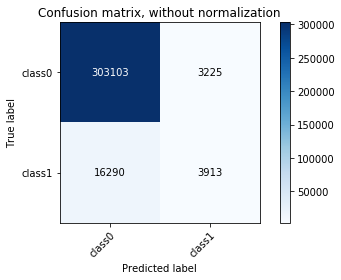

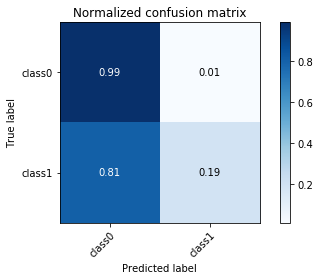


Tue, 24 September 2019 14:45:48


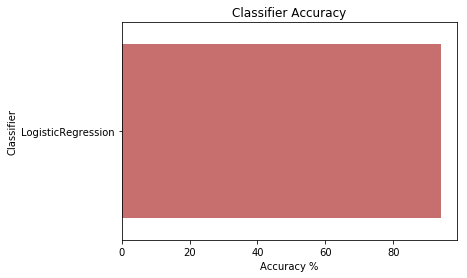

time: 4min 23s


In [0]:
# ~ 4 mins. Bare version of Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,precision_recall_fscore_support


# load the packages as needed
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
'''
from sklearn.linear_model import LogisticRegression




EST = timezone('US/Eastern')




result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)


classifiers = [
   # KNeighborsClassifier(2), #not so impressive performance, takes 90 mins   
   # RandomForestClassifier(), #performance not good.
   # GradientBoostingClassifier(), #performance not good
   #MultinomialNB() #performance not good.
   # XGBClassifier(), #performance not good.
   #LGBMClassifier(), #performance not good.
   #DecisionTreeClassifier(),# best so far excluding logistic regression ( balanced weights) but .40 is the accuracy on the second label.
   LogisticRegression()
]

 
for clf in classifiers:
    
    
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
      
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()





LogisticRegression

              precision    recall  f1-score   support

      class0       0.99      0.83      0.90    306328
      class1       0.25      0.84      0.39     20203

    accuracy                           0.84    326531
   macro avg       0.62      0.84      0.65    326531
weighted avg       0.94      0.84      0.87    326531

Confusion matrix, without normalization
[[255650  50678]
 [  3191  17012]]
Normalized confusion matrix
[[0.83 0.17]
 [0.16 0.84]]


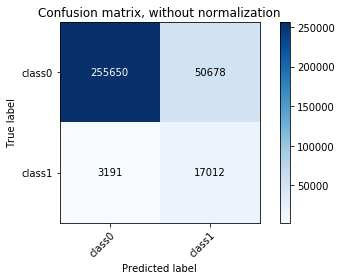

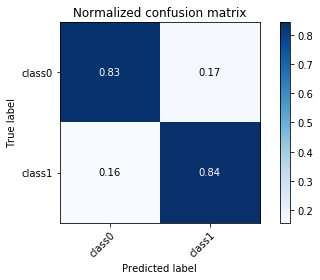


Tue, 24 September 2019 14:51:41


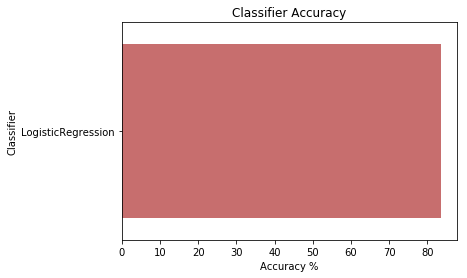

time: 3min 28s


In [0]:
# ~ 4 mins. Bare version of Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,precision_recall_fscore_support


# load the packages as needed
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
'''
from sklearn.linear_model import LogisticRegression




EST = timezone('US/Eastern')




result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)


classifiers = [
   # KNeighborsClassifier(2), #not so impressive performance, takes 90 mins   
   # RandomForestClassifier(), #performance not good.
   # GradientBoostingClassifier(), #performance not good
   #MultinomialNB() #performance not good.
   # XGBClassifier(), #performance not good.
   #LGBMClassifier(), #performance not good.
   #DecisionTreeClassifier(),# best so far excluding logistic regression ( balanced weights) but .40 is the accuracy on the second label.
   LogisticRegression(class_weight='balanced')
]

 
for clf in classifiers:
    
    
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
      
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()



